In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import joblib

%matplotlib inline

DATA 불러오기

In [5]:
cl10_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL10_gap.csv")
cl15_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL15_gap.csv")
gm10_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM10_gap.csv")
gm15_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM15_gap.csv")




In [8]:
cl10_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL10_fix.csv")
cl15_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL15_fix.csv")
gm10_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM10_fix.csv")
gm15_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM15_fix.csv")
cl10_drop = cl10_fix.drop("matchMin", axis=1)
cl15_drop = cl10_fix.drop("matchMin", axis=1)
gm10_drop = gm10_fix.drop("matchMin", axis=1)
gm15_drop = gm15_fix.drop("matchMin", axis=1)

datas = [cl10_drop, cl15_drop, gm10_drop, gm15_drop]
data_label = ["cl10", "cl15", "gm10", "gm15"]

In [9]:
cl10_gap

,Unnamed: 0,blueWins,blueFirstBlood,blueFirstTower,blueFirstInhibitor,blueFirstDragon,matchMin,TotalGold_Gap,AvgLever_Gap,TotalMinionKills_Gap,...,WardPlaced_Gap,WardKills_Gap,TowerKills_Gap,MidTowerKills_Gap,TopTowerKills_Gap,BotTowerKills_Gap,Inhibitor_Gap,Dragon_Gap,RiftHeralds_Gap,humanPrediction
0,0,True,1,0,0,1,41,558,0.4,1,...,-7,1,0,0,0,0,0,1,0,0
1,1,True,0,0,0,1,26,124,0.0,-7,...,-1,2,0,0,0,0,0,1,-1,1
2,2,True,1,0,0,0,33,-879,-0.2,-18,...,3,-3,0,0,0,0,0,0,1,0
3,3,False,1,0,0,1,21,-666,-0.2,-13,...,-4,0,0,0,0,0,0,1,0,0
4,4,False,1,0,0,0,34,2728,0.2,11,...,1,3,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1516,True,1,0,0,0,22,2227,0.4,23,...,-1,0,0,0,0,0,0,-1,1,0
1517,1517,False,1,0,0,0,22,-258,0.2,-1,...,19,-3,0,0,0,0,0,-1,0,0
1518,1518,True,1,0,0,0,23,3316,0.6,25,...,-1,0,0,0,0,0,0,-1,0,1
1519,1519,True,1,0,0,0,18,3439,0.0,17,...,16,6,0,0,0,0,0,0,0,1


# Human Accuracy

In [10]:
print(1-np.sum(np.abs(cl10_gap["humanPrediction"]-cl10_gap["blueWins"]))/len(cl10_gap))
print(1-np.sum(np.abs(cl15_gap["humanPrediction"]-cl15_gap["blueWins"]))/len(cl15_gap))
print(1-np.sum(np.abs(gm10_gap["humanPrediction"]-gm10_gap["blueWins"]))/len(gm10_gap))
print(1-np.sum(np.abs(gm15_gap["humanPrediction"]-gm15_gap["blueWins"]))/len(gm15_gap))

0.7094017094017093
0.7692307692307692
0.70369406867846
0.7646137787056367


# LGBM

In [11]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree, plot_split_value_histogram, create_tree_digraph

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

# Pred

In [13]:
import seaborn as sns

In [15]:
cl15_pred = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL15_pred.csv")
cl15_pred


,Unnamed: 0,blueTotalGolds,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,blueFirstBlood,blueKill,blueDeath,blueAssist,...,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON,predSuccess,blueWins,pred
0,566,24006,44,380,80,28655,0,8,9,8,...,0,0,0,0,0,0,0,0,1,0
1,1101,28048,46,375,71,29747,0,12,14,6,...,0,0,0,0,0,0,0,1,1,1
2,1473,22498,43,314,80,24097,0,6,9,8,...,0,1,1,0,0,0,0,1,0,0
3,1177,26775,46,386,80,26741,1,12,6,18,...,0,0,1,0,0,0,0,1,1,1
4,1009,25757,42,365,64,22740,1,8,12,10,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,286,25026,45,344,108,20994,1,4,8,1,...,0,0,0,0,0,1,0,1,0,0
453,1519,29826,47,380,95,30348,1,17,4,22,...,0,0,0,0,0,0,0,1,1,1
454,746,22489,42,292,64,30070,0,8,19,12,...,0,1,0,0,0,0,0,1,0,0
455,126,23505,45,327,75,23384,0,10,9,11,...,0,1,0,0,0,0,0,1,0,0


In [16]:
np.sum(cl15_pred["predSuccess"])/len(cl15_pred)


0.811816192560175

In [17]:
pd.DataFrame(cl15_pred["pred"])


,pred
0,0
1,1
2,0
3,1
4,0
...,...
452,0
453,1
454,0
455,0


In [18]:
data = cl15_gap.iloc[cl15_pred["Unnamed: 0"]].reset_index()
data["pred"]= cl15_pred["pred"]
data["predSuccess"] = cl15_pred["predSuccess"]
data["blueWins"] = cl15_pred["blueWins"]

In [19]:
data.columns

Index(['index', 'Unnamed: 0', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstInhibitor', 'blueFirstDragon', 'matchMin', 'TotalGold_Gap',
       'AvgLever_Gap', 'TotalMinionKills_Gap', 'TotalJungleMinionKills_Gap',
       'TotalDamageToChampion_Gap', 'Kill_Gap', 'Assist_Gap', 'WardPlaced_Gap',
       'WardKills_Gap', 'TowerKills_Gap', 'MidTowerKills_Gap',
       'TopTowerKills_Gap', 'BotTowerKills_Gap', 'Inhibitor_Gap', 'Dragon_Gap',
       'RiftHeralds_Gap', 'humanPrediction', 'pred', 'predSuccess'],
      dtype='object')

<AxesSubplot: xlabel='TotalGold_Gap', ylabel='Count'>

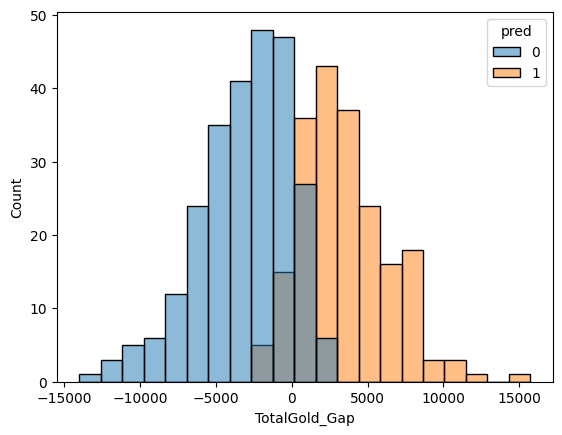

In [20]:
sns.histplot(data = data, x="TotalGold_Gap", hue = "pred")

<AxesSubplot: xlabel='Kill_Gap', ylabel='Count'>

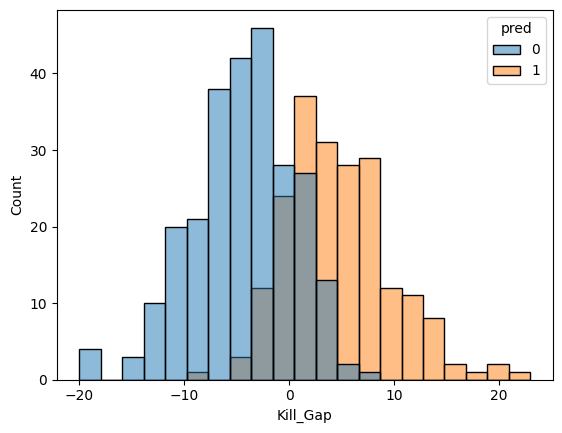

In [21]:
sns.histplot(data = data, x="Kill_Gap", hue = "pred")

<AxesSubplot: xlabel='TotalDamageToChampion_Gap', ylabel='Count'>

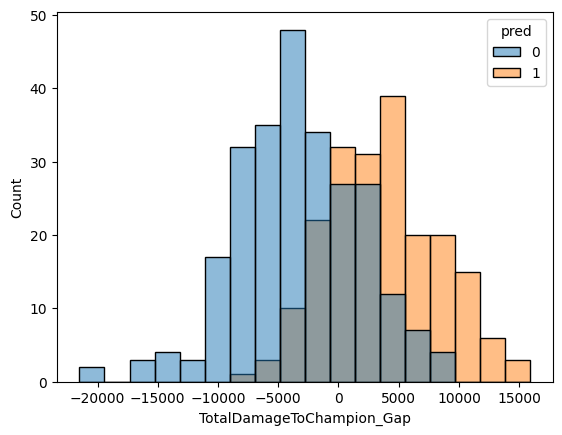

In [22]:
sns.histplot(data = data, x="TotalDamageToChampion_Gap", hue = "pred")

<AxesSubplot: xlabel='WardPlaced_Gap', ylabel='Count'>

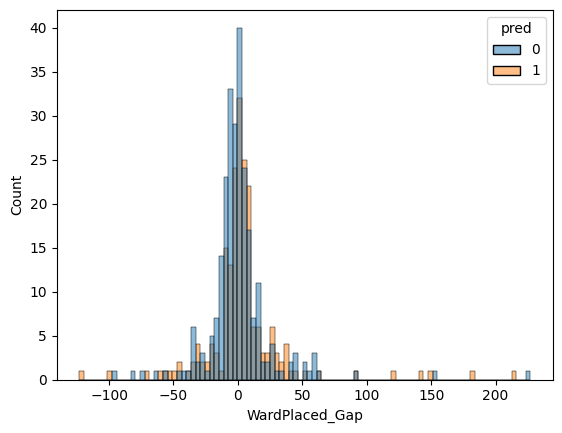

In [23]:
sns.histplot(data = data, x="WardPlaced_Gap", hue = "pred")

## T-test

In [24]:
from scipy import stats

In [43]:
data_1 = data[data["pred"]==1]
data_0 = data[data["pred"]==0]

In [44]:

t_stat, p_val = stats.ttest_ind(data_0["TotalGold_Gap"], data_1["TotalGold_Gap"], equal_var=True, alternative='less')
print("TotalGold_gap: \n t_statistics: {}, p_value : {} \n ".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["Kill_Gap"], data_1["Kill_Gap"], equal_var=True, alternative='less')
print("Kill_Gap: \n t_statistics: {}, p_value : {} \n".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["TotalDamageToChampion_Gap"], data_1["TotalDamageToChampion_Gap"], equal_var=True, alternative='less')
print("TotalDamageToChampion_Gap: \n t_statistics: {}, p_value : {} \n".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["WardPlaced_Gap"], data_1["WardPlaced_Gap"], equal_var=True, alternative='less')
print("WardPlaced_Gap: \n t_statistics: {}, p_value : {}\n".format(t_stat, p_val))

TotalGold_gap: 
 t_statistics: -23.082653208889077, p_value : 6.522451305091762e-79 
 
Kill_Gap: 
 t_statistics: -19.580435146312503, p_value : 1.1314845657676308e-62 

TotalDamageToChampion_Gap: 
 t_statistics: -14.915334006652515, p_value : 1.520780896718703e-41 

WardPlaced_Gap: 
 t_statistics: -1.2288354986734658, p_value : 0.10988432633437654



# predSuccess

<AxesSubplot: xlabel='Kill_Gap', ylabel='Count'>

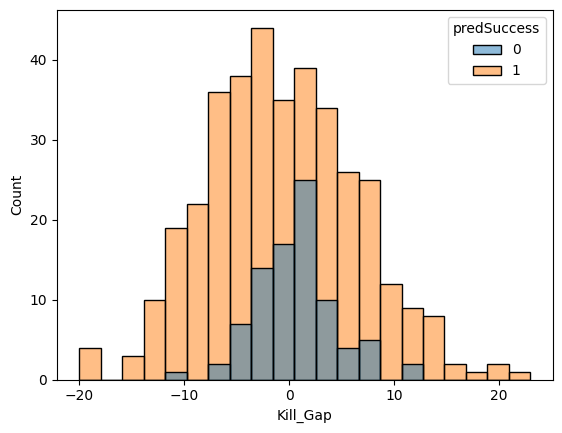

In [176]:
sns.histplot(data = data, x="Kill_Gap", hue = "predSuccess")

<AxesSubplot: xlabel='TotalGold_Gap', ylabel='Count'>

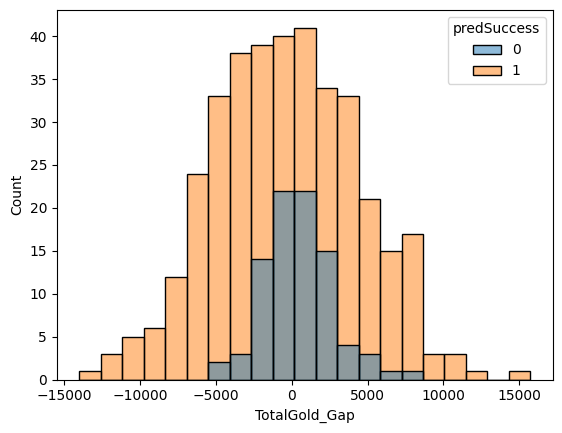

In [175]:
sns.histplot(data = data, x="TotalGold_Gap", hue = "predSuccess")

## T-Test

In [45]:
data_1 = data[data["predSuccess"]==1]
data_0 = data[data["predSuccess"]==0]

In [46]:
t_stat, p_val = stats.ttest_ind(data_0["TotalGold_Gap"], data_1["TotalGold_Gap"], equal_var=True, alternative='less')
print("TotalGold_gap: \n t_statistics: {}, p_value : {} \n ".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["Kill_Gap"], data_1["Kill_Gap"], equal_var=True, alternative='less')
print("Kill_Gap: \n t_statistics: {}, p_value : {} \n".format(t_stat, p_val))


TotalGold_gap: 
 t_statistics: 1.9091104853652576, p_value : 0.9715617007999355 
 
Kill_Gap: 
 t_statistics: 1.673268949218435, p_value : 0.952519158663098 

